# **Week 6 Project - Old Faithful Geyser Analysis**

## Author: Sarah Howard

### Date: June 7, 2024

#### **Overview: Project 6 - Datafun-06-EDA.  The goal of this project is to provide an analysis of the Old Faithful Geyser dataset that is available in Seaborn. The project should showcase the skills learned throughout this course, including the following:**
   1. Data Acquisition
   2. Initial Data Inspection
   3. Initial Descriptive Statistics
   4. Initial Data Distribution for Numerical Columns
   5. Initial Data Distribution for Categorical Columns
   6. Initial Data Preparation
   7. Initial Visualizations
   8. Initial Storytelling and Presentation


### *Import the libraries*

Before any analysis can begin, the python libraries needed to run the code need to be imported.

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### *Data acquisition - Geyser Dataset*

The following code imports the Old Faithful Geyser dataset from Seaborn and then shows the first 5 columns for the data.  It is also downloading the data set to a CSV file.

In [70]:
# Load the dataset into a pandas DataFrame - adjust this process for your custom data
geyser_df = sns.load_dataset('geyser')

# Inspect first rows of the DataFrame
print(geyser_df.head())

# Download the data set to a CSV
geyser_df.to_csv('geyser_dataset.csv', index=False)

   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long


### *Initial data inspection of the Geyser dataset*

The following code will display the first 10 rows of the dataframe.  Then it will give the shape of the data by presenting the number of rows and columns (rows, columns).  Finally, it will tell us the data type of each column.

In [71]:
print(geyser_df.head(10))
print(geyser_df.shape)
print(geyser_df.dtypes)

   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long
5     2.883       55  short
6     4.700       88   long
7     3.600       85   long
8     1.950       51  short
9     4.350       85   long
(272, 3)
duration    float64
waiting       int64
kind         object
dtype: object


### *Summary statistics of the numeric data*

The following code will display the summary statistics of each column containing numeric data.

In [72]:
print(geyser_df.describe())

         duration     waiting
count  272.000000  272.000000
mean     3.487783   70.897059
std      1.141371   13.594974
min      1.600000   43.000000
25%      2.162750   58.000000
50%      4.000000   76.000000
75%      4.454250   82.000000
max      5.100000   96.000000


### *Initial review of the data for duration of the eruption and waiting time between eruptions*

The following code will display a histograms of the duration of the eruption and the waiting time between eruptions.

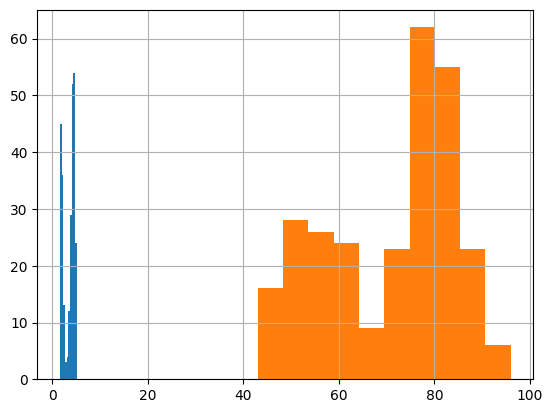

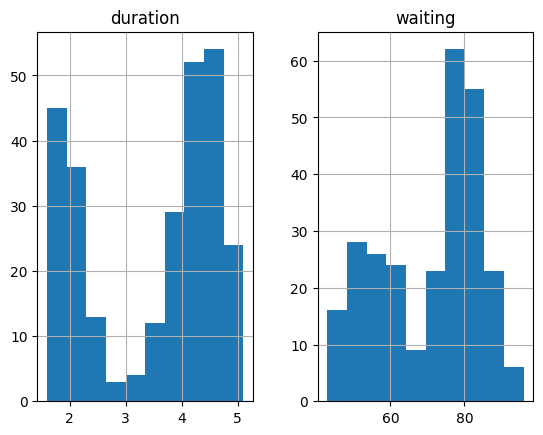

In [73]:
# Inspect histogram by numerical column
geyser_df['duration'].hist()
geyser_df['waiting'].hist()

# Inspect histograms for all numerical columns
geyser_df.hist()

# Show all plots
plt.show()

**Analysis**

* The duration time of the eruptions is much shorter than  the waiting time for the eruptions.  However, I am noticing that both duration and waiting make a "U" shape on the historgram and I am wondering if there is a correlation between how long the wait is and the duration of the eruption.

### *Initial review of whether an eruption is classified as long or short* 
The following code will display a histograms of the kind of eruptions - short or long.

kind
long     172
short    100
Name: count, dtype: int64


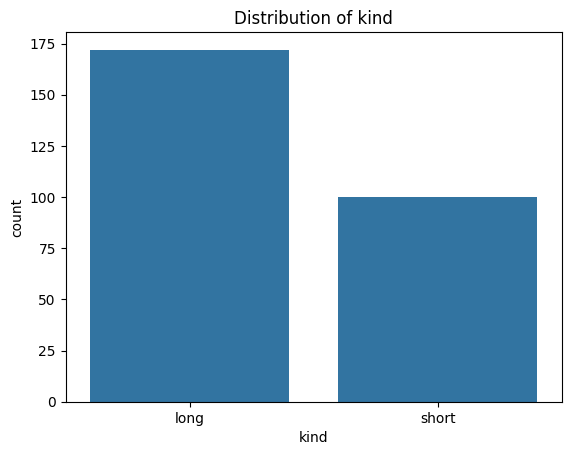

In [74]:
# Inspect value counts by categorical column
print(geyser_df['kind'].value_counts())

# Inspect value counts for all categorical columns
for col in geyser_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=geyser_df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

**Analysis**

* The number of eruptions that are classified as short is approximately 37% of all eruptions.  By comparison, approximately 68% of eruptions are classified as long.

### *Updating column names and manipulating the data*
The names of the columns are being updated as follows:

* Duration = Eruption Duration (minutes)
* Waiting = Eruption Waiting (minutes)

Then a scatterplot was created to reflect the comparison of these values.

Next, the data was manipulated to attempt to look at how the number of minutes of the duration affected the eruption waiting period.

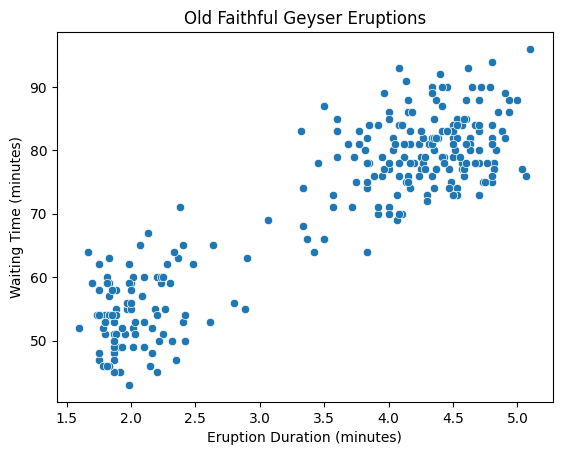

array([[<Axes: title={'center': 'Eruption Duration (minutes)'}>,
        <Axes: title={'center': 'Eruption Waiting (minutes)'}>],
       [<Axes: title={'center': 'Waiting/Duration'}>,
        <Axes: title={'center': 'Duration/Waiting'}>]], dtype=object)

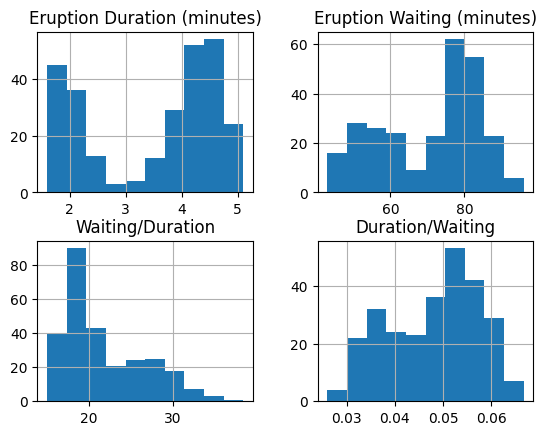

In [75]:
# Rename the column
geyser_df = geyser_df.rename(columns={"duration": "Eruption Duration (minutes)"})
geyser_df = geyser_df.rename(columns={"waiting": "Eruption Waiting (minutes)"})

# Show all plots
plt.show()
sns.scatterplot(x='Eruption Duration (minutes)', y='Eruption Waiting (minutes)', data=geyser_df)
plt.title('Old Faithful Geyser Eruptions')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.show()

#Adding new columns - Waiting time divided by duration
geyser_df['Waiting/Duration'] = geyser_df['Eruption Waiting (minutes)'] / geyser_df['Eruption Duration (minutes)']
geyser_df['Duration/Waiting'] = geyser_df['Eruption Duration (minutes)'] / geyser_df['Eruption Waiting (minutes)']
# Inspect histograms for all numerical columns
geyser_df.hist()


**Analysis**

* Based on the scatterplot, there appears to be a correlation between the length of the waiting time and the duration of the eruption.

* In reviewing the attempt to munipulate the data, it appears that a shorter waiting time results in increase in having a shorter duration period. In addition, a longer duration period appears to result in an longer waiting period.

### *Further visualization of the Geyser data*

Up until this point, the reviews have not taken into consideration the kind of geyser column.  The dataset also has a column indicating whether the geyser is classified as long or short.

The following charts are reflected how the eruption duration and how the eruption waiting time aligns with whether the geyser is classifed as long or short.

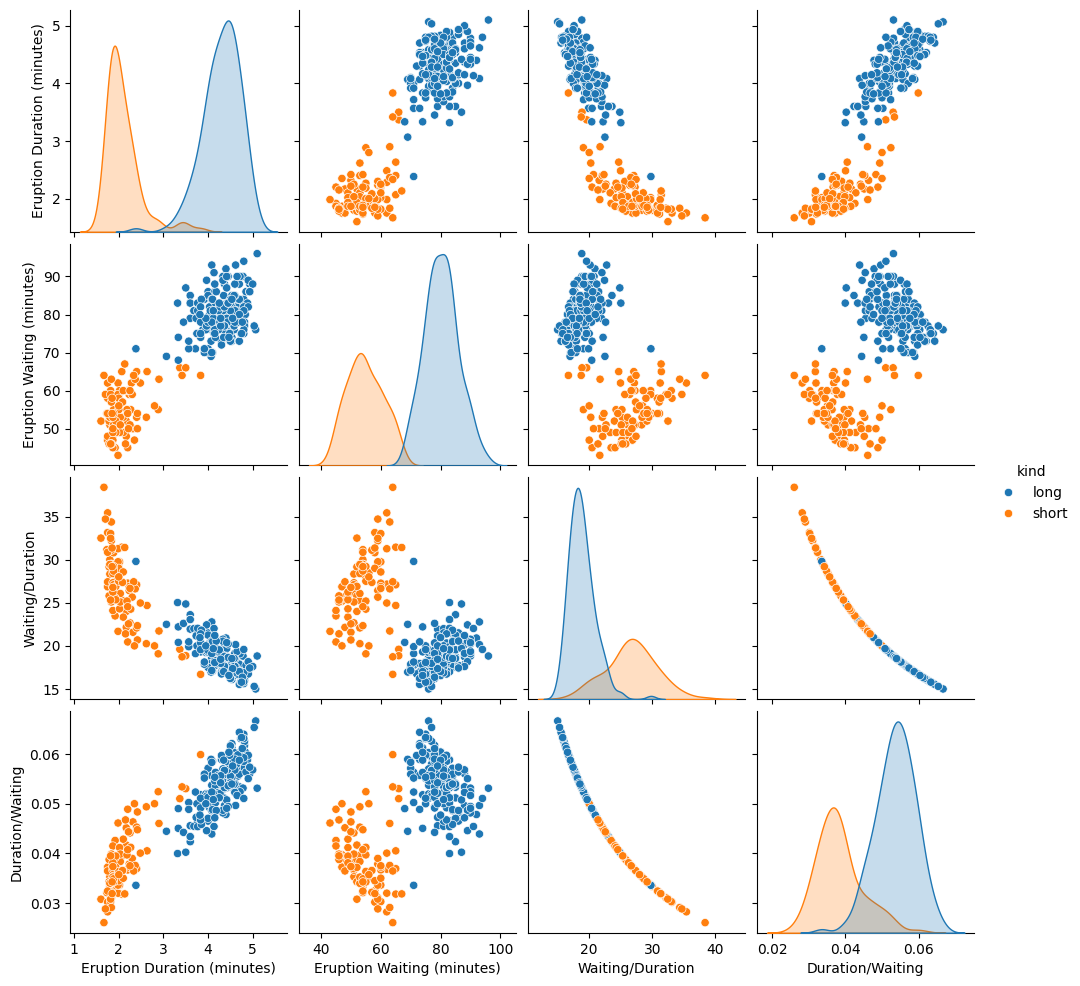

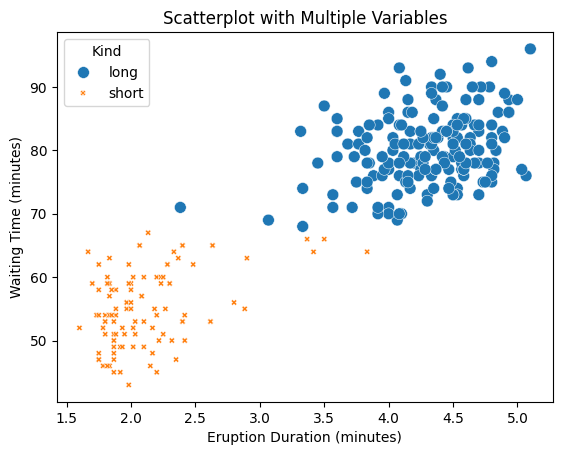

In [76]:
sns.pairplot(geyser_df, hue="kind")
plt.show()

# Create a scatterplot with multiple variables
sns.scatterplot(data=geyser_df, x='Eruption Duration (minutes)', y='Eruption Waiting (minutes)', hue='kind', size='kind', style='kind')

# Customize the plot
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('Scatterplot with Multiple Variables')
plt.legend(title='Kind')

# Show the plot
plt.show()




**Analysis**

In reviewing whether the geyser is classifed as short or long, there is very little overlap.  Typically, the short geysers have a shorter duration period and a shorter waiting period; the long geysers have a longer waiting period and a longer duration.



### *Conclusion*

When the dataset was being initially reviewed, the statistics did not provide any insight into whether there was a correlation between the duration of the eruption and the waiting time of the eruption.  The average duration of the eruption is 3.488 minutes and the average waiting time between eruptions is 70.897 minutes.  In looking at the distribution, it appears that 50% of the geysers have a longer duration and longer waiting period than the average.

Upon reviewing the initial numerical values of the length of the duration of the eruption and the waiting period of the eruption, there began to be signs that there was a correlation between the two values.  As we reviewed the information further, we continued to see where there appeared to be an alignment between shorter duration  and a shorter waiting period as well as a longer duration period and a longer waiting period.

With the final visualizations including the short and the long classifications, the impact of the shorter duration on the shorter waiting period and the longer duration on the longer waiting period became very clear.  By using this data, we can anticipate whether the waiting period will be short or long based the duration of the eruption.